## Basic Understanding -  

The demand for a product or service is the quantity of that product or service the customers are willing to purchase at any given price during a particular period. And the supply for a product or service is the quantity the producers are willing to provide in the market at a particular price and a particular period.

## Dataset - 

 The dataset is based on the demand for cab rides at a given time and the availability of drivers at a given time.

## Importing Dependencies

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/rides.csv')

In [3]:
df.head()

,Drivers Active Per Hour,Riders Active Per Hour,Rides Completed
0,72,295,202.0
1,50,78,43.0
2,40,250,181.0
3,78,140,124.0
4,74,195,108.0


## Exploring dataset

In [4]:
df.describe()

,Drivers Active Per Hour,Riders Active Per Hour,Rides Completed
count,1099.000000,1099.000000,1045.000000
mean,55.212921,175.372157,107.470813
std,25.896744,72.304222,57.340921
min,10.000000,50.000000,2.000000
25%,34.000000,114.000000,66.000000
50%,55.000000,174.000000,96.000000
75%,78.000000,238.000000,142.000000
max,100.000000,300.000000,273.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Drivers Active Per Hour  1099 non-null   int64  
 1   Riders Active Per Hour   1099 non-null   int64  
 2   Rides Completed          1045 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 25.9 KB


We can see that there are some null values in "Rides Completed" as the total number is less than the other two columns. We can confirm by using the follwing - 

In [6]:
df.isnull().sum()

Drivers Active Per Hour     0
Riders Active Per Hour      0
Rides Completed            54
dtype: int64

Before moving forward, we need to drop these rows containing null values.

In [7]:
df = df.dropna()

Checking if the drop was successful or not.

In [8]:
df.isnull().sum()

Drivers Active Per Hour    0
Riders Active Per Hour     0
Rides Completed            0
dtype: int64

We are now ready to plot the data points for better visualisation.

## Visualization

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

In [10]:
demand = df["Drivers Active Per Hour"]
supply = df["Riders Active Per Hour"]

Text(0, 0.5, 'Number of Riders Active per Hour (Demand)')

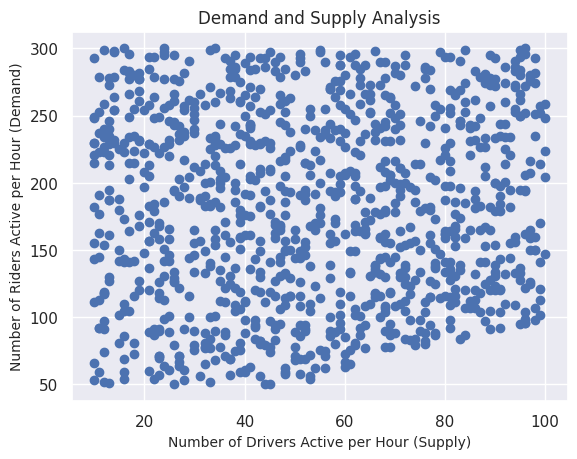

In [11]:
plt.scatter(demand,supply)
plt.title("Demand and Supply Analysis")
plt.xlabel("Number of Drivers Active per Hour (Supply)", fontsize =10)
plt.ylabel("Number of Riders Active per Hour (Demand)", fontsize =10)

We will find a trendline by getting the regression line using OLS model.

In [12]:
x = sm.add_constant(demand)
results = sm.OLS(supply,x).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Riders Active Per Hour   R-squared:                       0.002
Model:                                OLS   Adj. R-squared:                  0.001
Method:                     Least Squares   F-statistic:                     1.997
Date:                    Sat, 25 Mar 2023   Prob (F-statistic):              0.158
Time:                            23:38:20   Log-Likelihood:                -5913.5
No. Observations:                    1045   AIC:                         1.183e+04
Df Residuals:                        1043   BIC:                         1.184e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     174.6816      5.005     34.904      0.000     164.861     184.502
Drivers Active Per Hour     0.1189      0.084      1.413      0.158      -0.046       0.284
==============================================================================
Omnibus:                      735.254   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.087
Skew:                          -0.018   Prob(JB):                     3.30e-14
Kurtosis:                       1.806   Cond. No.                         139.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

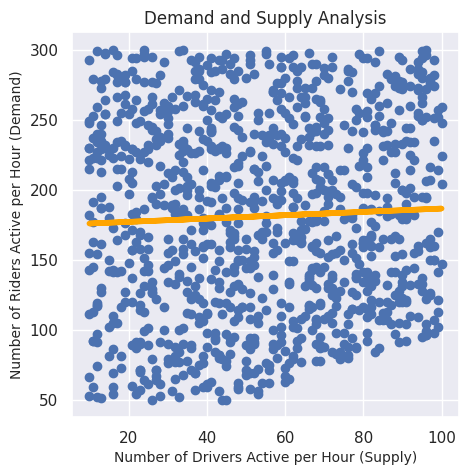

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.scatter(demand, supply)
ax.set_title("Demand and Supply Analysis")
ax.set_xlabel("Number of Drivers Active per Hour (Supply)", fontsize=10)
ax.set_ylabel("Number of Riders Active per Hour (Demand)", fontsize=10)

yhat = 0.1189 * demand + 174.6816
trendline = ax.plot(demand, yhat, lw=4, c='orange', label='regression line')
plt.show()

###  We can directly find the trendline by using seaborn's lmplot

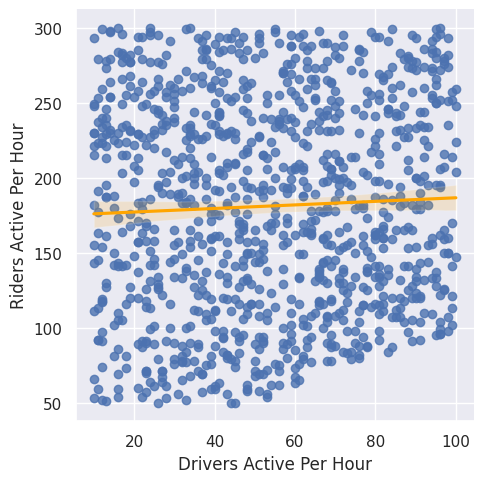

In [14]:
sns.lmplot(x="Drivers Active Per Hour", y="Riders Active Per Hour", data=df, line_kws={'color': 'orange'})



#### NB -
The full form of lmplot in seaborn is "linear model plot". It is a function used for plotting linear models, including regression models, in seaborn.

The lmplot() function can be used to create a scatter plot with a linear regression line, as well as other types of linear models such as logistic regression, robust regression, and polynomial regression

#### Inference - 
There is a constant relationship between the number of drivers active per hour and the number of riders active per hour means that for every X number of drivers, there is a consistent and predictable Y number of riders, and this ratio remains constant over time.

## Calculating Elasticity of Demand

Elasticity of demand refers to the measure of responsiveness of the demand for rides with respect to changes in the number of active drivers per hour.

Elasticity of demand is typically calculated as the percentage change in quantity demanded divided by the percentage change in the price of a good or service. However, in this case, the price of a ride is not explicitly mentioned, and instead, the number of active drivers per hour is used as a proxy for supply.

To calculate the elasticity of demand for rides with respect to the number of active drivers per hour, we would need to estimate the percentage change in the quantity of rides demanded due to a given percentage change in the number of active drivers per hour. 

In [15]:
avg_demand = df['Riders Active Per Hour'].mean()
avg_supply = df['Drivers Active Per Hour'].mean()
pct_change_demand = (max(df['Riders Active Per Hour']) - min(df['Riders Active Per Hour'])) / avg_demand * 100
pct_change_supply = (max(df['Drivers Active Per Hour']) - min(df['Drivers Active Per Hour'])) / avg_supply * 100
elasticity = pct_change_demand / pct_change_supply

print("Elasticity of demand with respect to the number of active drivers per hour: {:.2f}".format(elasticity))

Elasticity of demand with respect to the number of active drivers per hour: 0.82


It signifies a moderately responsive relationship between the demand for rides and the number of active drivers per hour. Specifically, this means that a 1% increase in the number of active drivers per hour would lead to a 0.82% decrease in the demand for rides, while a 1% decrease in the number of active drivers per hour would lead to a 0.82% increase in the demand for rides.

This level of elasticity suggests that the demand for rides is somewhat sensitive to changes in the number of active drivers per hour.

## Supply Ratio

In [16]:
df["Supply Ratio"] = df["Rides Completed"] / df["Drivers Active Per Hour"]
df.head()

,Drivers Active Per Hour,Riders Active Per Hour,Rides Completed,Supply Ratio
0,72,295,202.0,2.805556
1,50,78,43.0,0.860000
2,40,250,181.0,4.525000
3,78,140,124.0,1.589744
4,74,195,108.0,1.459459


#### Visualizing the supply ratio 

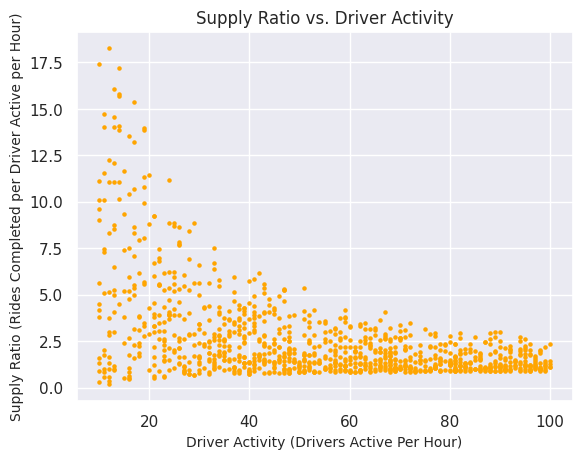

In [17]:
ratio = df["Supply Ratio"]
plt.scatter(demand,ratio, marker = 'o', s=5, c= "orange")
plt.title('Supply Ratio vs. Driver Activity')
plt.xlabel('Driver Activity (Drivers Active Per Hour)', size =10)
plt.ylabel('Supply Ratio (Rides Completed per Driver Active per Hour)',size=10)

plt.show()